Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggformula
Loading required package: ggplot2

New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Loading required package: Matrix

The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.

Note: If you use the Matrix package, be sure to load it BEFORE loading mosaic.

Attaching package: ‘mosaic’

The following object is masked from ‘package:Matrix’:

    mean

The following objects are masked from ‘package:dplyr’:

    count, do, tally

The following objects are masked from ‘pac

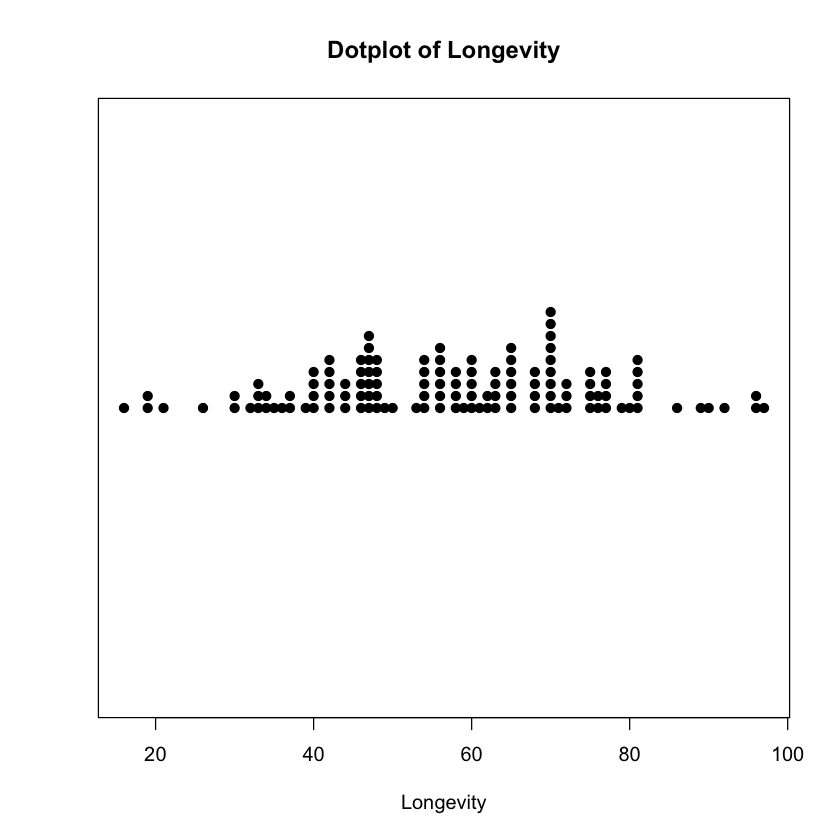

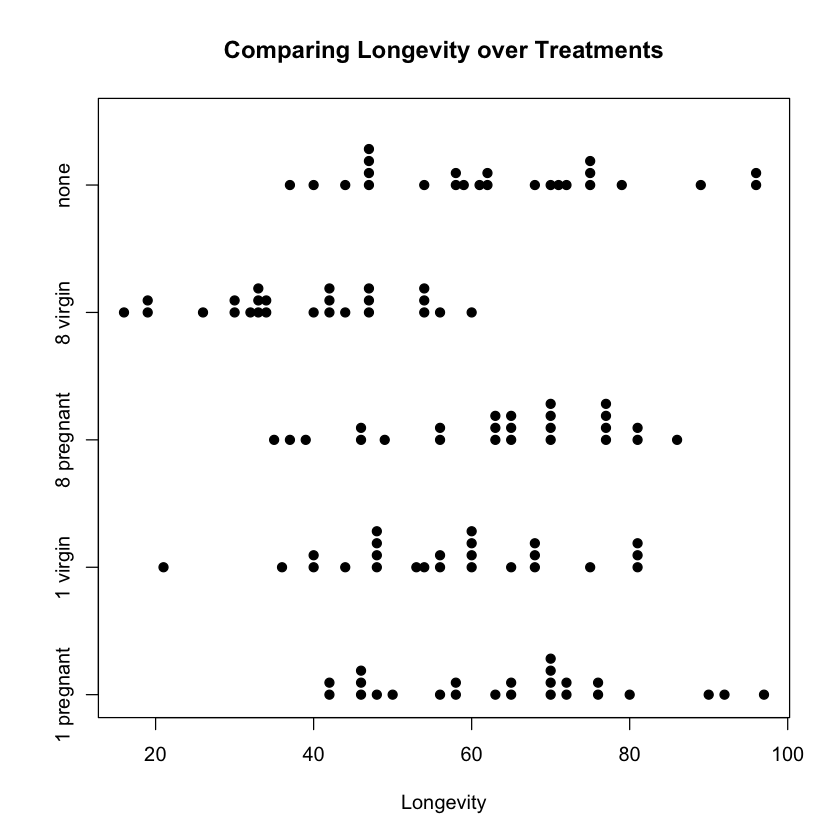

,n,mean,sd
1 pregnant,25,64.80,15.65
1 virgin,25,56.76,14.93
8 pregnant,25,63.36,14.54
8 virgin,25,38.72,12.10
none,25,63.56,16.45


n.tot,mean.tot,sd.tot
125,57.44,17.56389



	Pairwise comparisons using t tests with pooled SD 

data:  Longevity and Treatment 

           1 pregnant 1 virgin 8 pregnant 8 virgin
1 virgin   0.34369    -        -          -       
8 pregnant 1.00000    0.53548  -          -       
8 virgin   7.3e-08    0.00024  3.0e-07    -       
none       1.00000    0.53548  1.00000    2.7e-07 

P value adjustment method: holm 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Treatment,4,11939.28,2984.8200,13.61195,3.515622e-09
Residuals,120,26313.52,219.2793,NA,NA


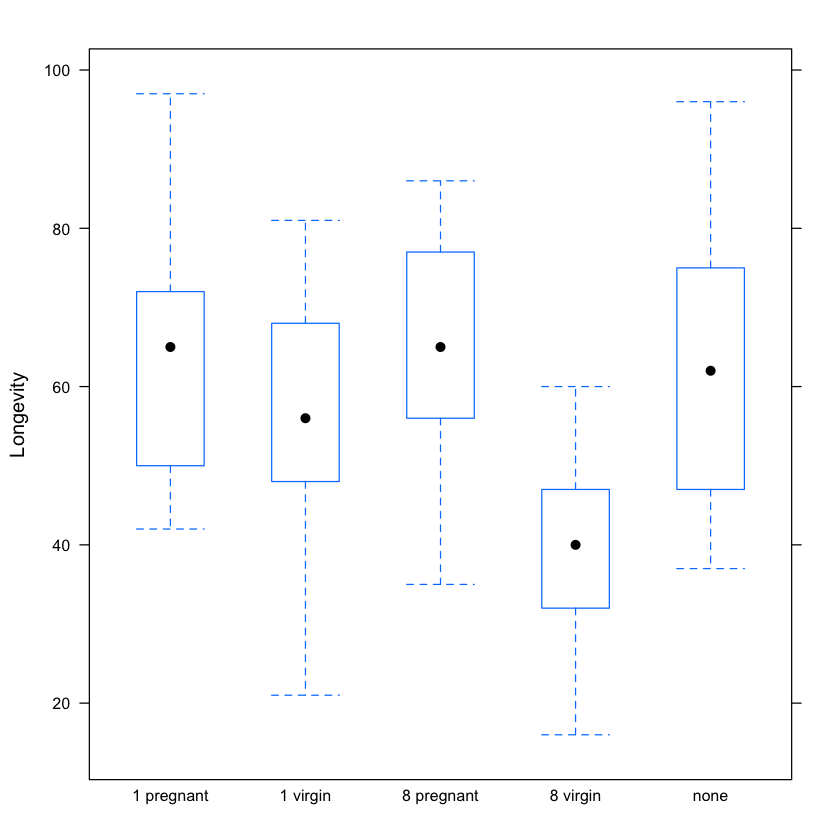

[1] 1.359504

ERROR: Error: package or namespace load failed for ‘agricolae’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘deldir’


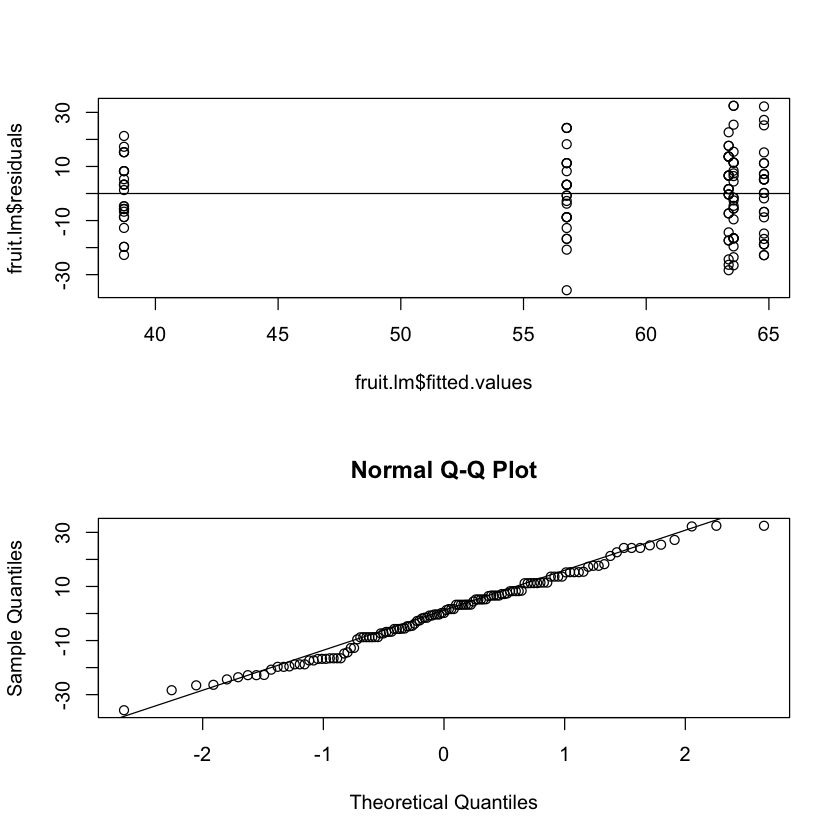

In [1]:
library(Stat2Data)
library(lattice)
library(mosaic)

data("FruitFlies")
Fruitflies.new=na.omit(FruitFlies)
attach(Fruitflies.new)


#Graphical Summaries
par(mfrow=c(1,1))
stripchart(Longevity, method="stack", pch=19, 
           main="Dotplot of Longevity", offset=0.5,
           xlab="Longevity")
stripchart(Longevity~Treatment, method="stack", pch=19, 
           main="Comparing Longevity over Treatments", offset=0.5,
           xlab="Longevity")

bwplot(Longevity ~ Treatment)  # The order dictates whether the boxplots are horizontal or vertical

#Numerical Summaries
n = tapply(Longevity, Treatment,  length)
mean= round(tapply(Longevity, Treatment, mean),2)
sd = round(tapply(Longevity, Treatment, sd),2)
cbind(n, mean, sd)

n.tot = length(Longevity)
mean.tot = mean(Longevity)
sd.tot = sd(Longevity)
cbind(n.tot, mean.tot, sd.tot)
#Pairwise T-tests
pairwise.t.test(Longevity, Treatment)

#Analysis of Variance
fruit.lm=lm(Longevity~Treatment)
anova(fruit.lm)

#Assessing Model Conditions
par(mfrow = c(2,1))
plot(fruit.lm$fitted.values, fruit.lm$residuals)
abline(h=0)
qqnorm(fruit.lm$residuals)
qqline(fruit.lm$residuals)

s.min = min(sd)
s.max = max(sd)
s.max/s.min

#Fisher's LSD
library(agricolae)
fish = LSD.test(Longevity, Treatment, 120, 219.28)
fish


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = x)

$Treatment
                        diff        lwr        upr     p adj
1 virgin-1 pregnant    -8.04 -19.640468   3.560468 0.3126549
8 pregnant-1 pregnant  -1.44 -13.040468  10.160468 0.9969591
8 virgin-1 pregnant   -26.08 -37.680468 -14.479532 0.0000001
none-1 pregnant        -1.24 -12.840468  10.360468 0.9983034
8 pregnant-1 virgin     6.60  -5.000468  18.200468 0.5157692
8 virgin-1 virgin     -18.04 -29.640468  -6.439532 0.0003240
none-1 virgin           6.80  -4.800468  18.400468 0.4854206
8 virgin-8 pregnant   -24.64 -36.240468 -13.039532 0.0000004
none-8 pregnant         0.20 -11.400468  11.800468 0.9999988
none-8 virgin          24.84  13.239532  36.440468 0.0000003



	Pairwise comparisons using t tests with pooled SD 

data:  Longevity and Treatment 

           1 pregnant 1 virgin 8 pregnant 8 virgin
1 virgin   0.34369    -        -          -       
8 pregnant 1.00000    0.53548  -          -       
8 virgin   7.3e-08    0.00024  3.0e-07    -       
none       1.00000    0.53548  1.00000    2.7e-07 

P value adjustment method: holm 


	Pairwise comparisons using t tests with pooled SD 

data:  Longevity and Treatment 

           1 pregnant 1 virgin 8 pregnant 8 virgin
1 virgin   0.57282    -        -          -       
8 pregnant 1.00000    1.00000  -          -       
8 virgin   7.3e-08    0.00034  3.7e-07    -       
none       1.00000    1.00000  1.00000    3.0e-07 

P value adjustment method: bonferroni 


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



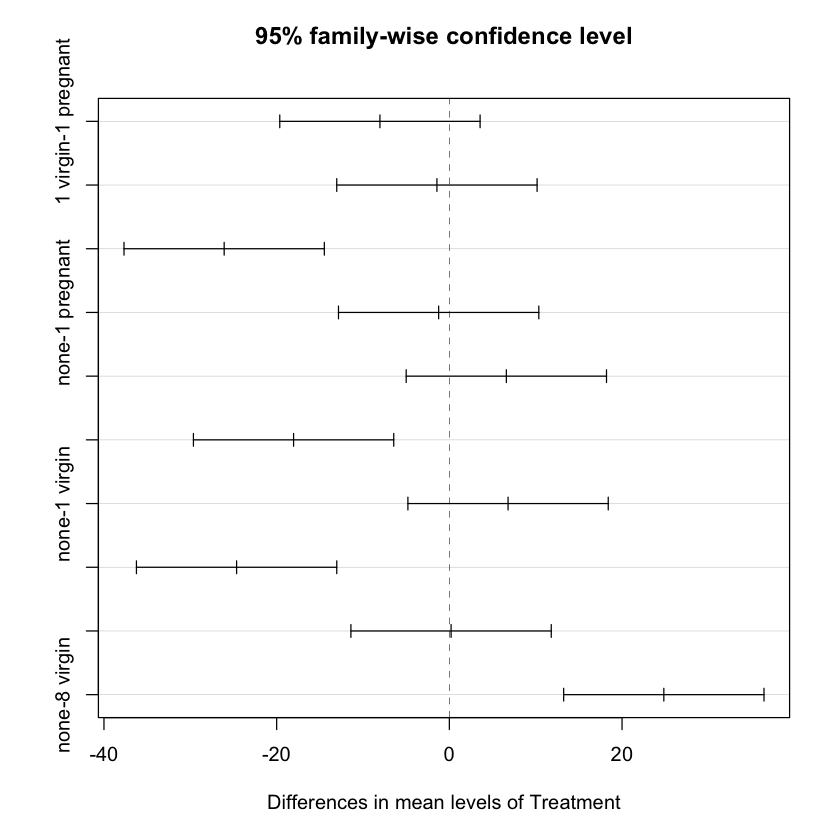

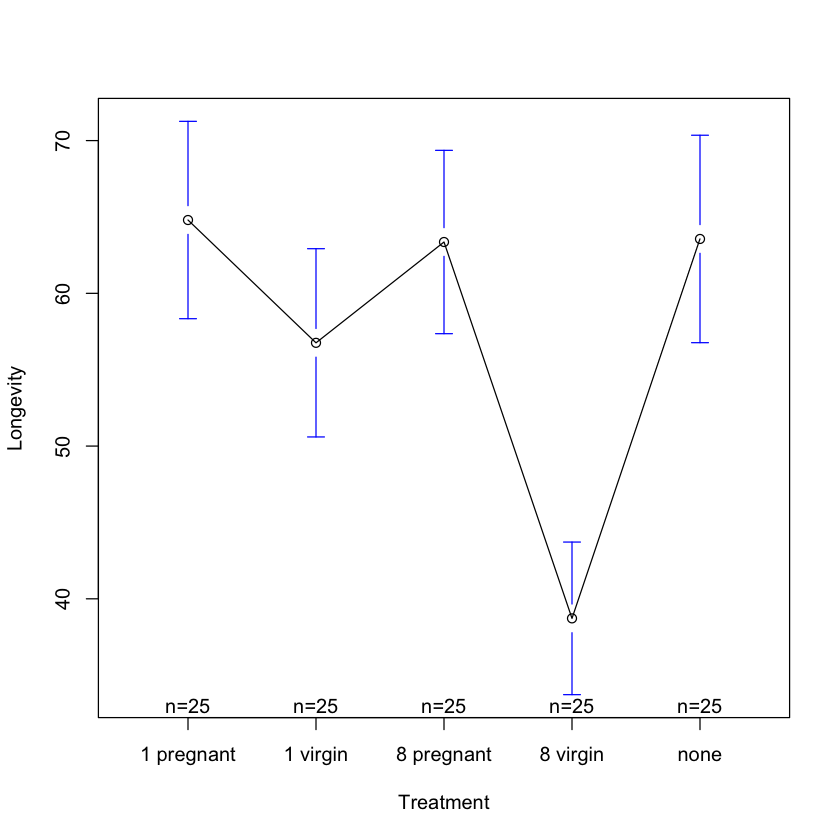

In [2]:
#Finding t multiplier for Fisher intervals

multiplier = qt(0.025, lower.tail = FALSE, df=120)

#Alternative adjustments to control for Type I Error

TukeyHSD(fruit.lm)

plot(TukeyHSD(fruit.lm))
#Pairwise T-tests

pairwise.t.test(Longevity, Treatment)  #Fisher LSD

pairwise.t.test(Longevity, Treatment, p.adj="bonferroni")    #Bonferroni

#Plot means individually

library(gplots)

plotmeans(Longevity~Treatment)